In [1]:
!pip install nibabel

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
##Import necessary libraries
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras.optimizers import Adam

In [7]:
##Function to load in images, only using 40 slices per MRI
def load_data(imgs, file):
    loaded = nib.load(file).get_fdata()
    print(loaded.shape)

    for i in range(40):   
      imgs.append(loaded[:,:,50+i])

In [77]:
##Create the U-Net Autoencoder
def get_unit(latent_dim=128):
    input = keras.layers.Input(shape = (240,240,1))
    x = keras.layers.BatchNormalization()(input)
    x1 = tf.keras.layers.Conv2D(64,kernel_size = (3,3), strides = 1, activation = 'relu', padding = 'same')(x)
    x = tf.keras.layers.MaxPooling2D((2,2))(x)
    x2 = tf.keras.layers.Conv2D(32, (3,3), strides = 1, activation = 'relu', padding = 'same')(x)
    x = tf.keras.layers.MaxPooling2D((2,2))(x)
    x3 = tf.keras.layers.Conv2D(16, (3,3), strides = 1, activation = 'relu', padding = 'same')(x)
    shape_before_flatten = tf.keras.backend.int_shape(x)[1:]
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dropout(0.2)(x)
    x = tf.keras.layers.Dense(256, activation = 'relu')(x)
    ##Create latent space vector
    latent_vec = tf.keras.layers.Dense(latent_dim)(x)
    x = tf.keras.layers.Dense(256, activation = 'relu')(latent_vec)
    x = tf.keras.layers.Dense(units=np.prod(shape_before_flatten))(x)
    x = tf.keras.layers.Reshape(target_shape = shape_before_flatten)(x)
    x = tf.keras.layers.Dropout(0.2)(x)
    x = tf.keras.layers.Conv2DTranspose(16, (3,3), strides = 1, activation = 'relu', padding = 'same')(x)
    x = tf.keras.layers.Concatenate()([x, x3])
    x = tf.keras.layers.Conv2D(16,kernel_size = (3,3), strides = 1, activation = 'relu', padding = 'same')(x)
    x = tf.keras.layers.UpSampling2D((2,2))(x)
    x = tf.keras.layers.Conv2DTranspose(32, (3,3), strides = 1, activation = 'relu', padding = 'same')(x)
    x = tf.keras.layers.Concatenate()([x, x2])
    x = tf.keras.layers.Conv2D(32,kernel_size = (3,3), strides = 1, activation = 'relu', padding = 'same')(x)
    x = tf.keras.layers.UpSampling2D((2,2))(x)
    x = tf.keras.layers.Conv2DTranspose(64, (3,3), strides = 1, activation = 'relu', padding = 'same')(x)
    x = tf.keras.layers.Concatenate()([x, x1])
    x = tf.keras.layers.Conv2D(64,kernel_size = (3,3), strides = 1, activation = 'relu', padding = 'same')(x)
    output = tf.keras.layers.Conv2D(4, (3,3), strides = 1, activation = 'softmax', padding = 'same')(x)
    
    
    model = keras.models.Model(input, output)
    return model

In [24]:
file_dir= 'BratsData/'

In [25]:
##Load in model
model = get_unit()

In [26]:
##Create optimizer
opt = Adam(
    learning_rate=0.000015,
    epsilon=1e-08)

In [80]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 240, 240, 1  0           []                               
                                )]                                                                
                                                                                                  
 batch_normalization_2 (BatchNo  (None, 240, 240, 1)  4          ['input_3[0][0]']                
 rmalization)                                                                                     
                                                                                                  
 max_pooling2d_4 (MaxPooling2D)  (None, 120, 120, 1)  0          ['batch_normalization_2[0][0]']  
                                                                                            

In [31]:
##Create datasets for the image data
imgs = []
hold_imgs = []
segs = []
hold_segs = []

In [29]:
import random
import os

In [32]:
#Load in data for 40 MRIs (wasn't able to load in more due to RAM capacity), randomly assign 20% of them to the holdout set
j = 0
for i in os.listdir(os.path.join(file_dir)):
    j=j+1
    if(j>40):
        break
    r = random.random()
    if r<=0.8:

        load_data(imgs,file_dir + str(i)+ '/'+str(i)+'_flair.nii.gz')
        load_data(segs, file_dir +  str(i)+ '/'+str(i)+'_seg.nii.gz')
    else:
        load_data(hold_imgs, file_dir +  str(i)+ '/'+str(i)+'_flair.nii.gz')
        load_data(hold_segs, file_dir + str(i)+ '/'+str(i)+'_seg.nii.gz')

(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 240, 155)
(240, 24

In [33]:
##Turn into numpy array
hold_imgs = np.array(hold_imgs)
hold_segs = np.array(hold_segs)
imgs = np.array(imgs)
segs = np.array(segs)

In [37]:
##Clean up data sets and delete images without a mask
f = []
for i in range(segs.shape[0]):
  
  if segs[i].max() == 0:
    f.append(i)
segs = np.delete(segs, f, 0)
imgs = np.delete(imgs, f, 0)

In [41]:
l = []
for i in range(hold_segs.shape[0]):
  
  if hold_segs[i].max() == 0:
    l.append(i)
hold_segs = np.delete(hold_segs, l, 0)
hold_imgs = np.delete(hold_imgs, l, 0)

In [47]:
##Since the original classifications are 0,1,2,4 we are changing 4 to 3 in the masks so the classification values are all consecutive numbers
def myfunc(x):
    if x==4:
        return 3
    else:
        return x


  

In [48]:
segs = np.vectorize(myfunc)(segs)

In [49]:
hold_segs = np.vectorize(myfunc)(hold_segs)

In [ ]:
##Make data categorical to shape (None, 240, 240, 4)
from tensorflow.keras.utils import to_categorical
segs_cat = to_categorical(segs, num_classes=4)


In [51]:
from tensorflow.keras.utils import to_categorical
hold_cat = to_categorical(hold_segs, num_classes=4)


In [52]:
##Train the model
model.compile(optimizer = opt, loss = 'categorical_crossentropy')
history = model.fit(x = imgs, y = segs_cat, batch_size = 16, epochs=75, validation_split = 0.3)

Epoch 1/75
41/41 [==============================] - 17s 215ms/step - loss: 1.2799 - val_loss: 1.1926
Epoch 2/75
41/41 [==============================] - 6s 140ms/step - loss: 1.1215 - val_loss: 0.9130
Epoch 3/75
41/41 [==============================] - 6s 141ms/step - loss: 0.6292 - val_loss: 0.2713
Epoch 4/75
41/41 [==============================] - 6s 141ms/step - loss: 0.1948 - val_loss: 0.1912
Epoch 5/75
41/41 [==============================] - 6s 141ms/step - loss: 0.1508 - val_loss: 0.1689
Epoch 6/75
41/41 [==============================] - 6s 141ms/step - loss: 0.1351 - val_loss: 0.1561
Epoch 7/75
41/41 [==============================] - 6s 141ms/step - loss: 0.1250 - val_loss: 0.1479
Epoch 8/75
41/41 [==============================] - 6s 141ms/step - loss: 0.1168 - val_loss: 0.1409
Epoch 9/75
41/41 [==============================] - 6s 141ms/step - loss: 0.1104 - val_loss: 0.1353
Epoch 10/75
41/41 [==============================] - 6s 142ms/step - loss: 0.1045 - val_loss: 0.129

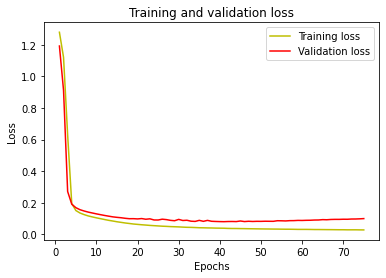

In [53]:
##Plot the training and validation loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [54]:
hold_imgs = np.array(hold_imgs)

In [57]:
##Predict masks on holdout images
predicted = model.predict(hold_imgs)

12/12 [==============================] - 2s 195ms/step


In [38]:
hold_segs = np.array(hold_segs)

In [72]:
##Evaluate model results on holdout images. Loss of 0.076 is very good
model.evaluate(hold_imgs, hold_cat)

12/12 [==============================] - 1s 91ms/step - loss: 0.0758


0.07578527182340622

In [60]:
##Make predictions suitable to plot
y_pred_argmax=np.argmax(predicted, axis=3)
y_pred_argmax.shape

(383, 240, 240)

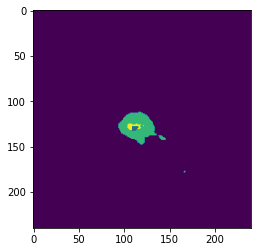

In [81]:
##Example of predicted mask and corresponding truth mask
plt.imshow(y_pred_argmax[10])

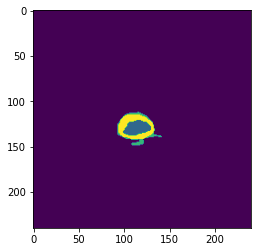

In [82]:
plt.imshow(hold_segs[10])